<a href="https://colab.research.google.com/github/MaelaGLG/ML-for-econometrics/blob/main/notebooks/flexible_models_practical_session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


The aim of the exercise is to get familiar with the histogram gradient-boosting in scikit-learn. Besides, we will use this model within a cross-validation framework in order to inspect internal parameters found via grid-search.

We will use the California housing dataset.

In [21]:
print(fetch_california_housing(as_frame=True))

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -1

In [1]:
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$

In [19]:
from sklearn.datasets import fetch_california_housing


In [3]:
print(data)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [4]:
print(target)

0        452.6
1        358.5
2        352.1
3        341.3
4        342.2
         ...  
20635     78.1
20636     77.1
20637     92.3
20638     84.7
20639     89.4
Name: MedHouseVal, Length: 20640, dtype: float64


### 📝 TODO: First, create a histogram gradient boosting regressor. You can set the trees number to be large, and configure the model to use early-stopping.

In [6]:
# CODE HERE

# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 🔍 Étape 2 : Préparation des données
data = data.dropna()  # Suppression des valeurs manquantes

# Supposons que la dernière colonne est la variable cible
X = data
y = target

# Division en train (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 Étape 3 : Définition du modèle Gradient Boosting avec early stopping
model = HistGradientBoostingRegressor(
    max_iter=100,  # Grand nombre d'arbres
    early_stopping=True,  # Arrêt si pas d'amélioration
    validation_fraction=0.1,  # 10% du train pour validation
    random_state=42
)

# 📈 Étape 4 : Entraînement du modèle
model.fit(X_train, y_train)

# 📊 Étape 5 : Prédictions et évaluation
y_pred = model.predict(X_test)

# Calcul des métriques
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Affichage des résultats
print(f"📌 R² Score: {r2:.4f}")
print(f"📌 RMSE: {rmse:.4f}")


📌 R² Score: 0.8355
📌 RMSE: 46.4225


### 📝 TODO: Use `RandomizedSearchCV` with `n_iter=20` to find the best set of
hyperparameters by tuning the following parameters of the `model`:
- max_depth: [3, 8];
- max_leaf_nodes: [15, 31];
- learning_rate: [0.1, 1].

Notice that in the notebook "Hyperparameter tuning by randomized-search" we
pass distributions to be sampled by the `RandomizedSearchCV`. In this case we
define a fixed grid of hyperparameters to be explored. Using a `GridSearchCV`
instead would explore all the possible combinations on the grid, which can be
costly to compute for large grids, whereas the parameter `n_iter` of the
`RandomizedSearchCV` controls the number of different random combination that
are evaluated. Notice that setting `n_iter` larger than the number of possible
combinations in a grid would lead to repeating
already-explored combinations. Here, this can't happen since the learning rate is sampled from a uniform so the number of possible combinations is infinite.

max_depth: {3, 8} (contrôle la profondeur maximale des arbres)

max_leaf_nodes: {15, 31} (contrôle le nombre maximum de feuilles)

learning_rate: [0.1, 1] (valeur continue tirée aléatoirement dans cet intervalle)

Nous utilisons RandomizedSearchCV avec n_iter=20, ce qui signifie que 20 combinaisons aléatoires seront testées. Cela permet de trouver une bonne configuration sans tester toutes les combinaisons possibles, contrairement à GridSearchCV qui testerait tout et serait plus coûteux en calcul.

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
# Définition de l'espace de recherche des hyperparamètres
param_distributions = {
    'max_depth': [3, 8],
    'max_leaf_nodes': [15, 31],
    'learning_rate': uniform(0.1, 0.9)  # Uniforme entre 0.1 et 1 (0.1 + 0.9)
}

# Création du modèle de base
model = HistGradientBoostingRegressor(random_state=42)

# 🔹 Étape 4 : Configuration de RandomizedSearchCV
# n_iter=20 -> évalue 20 combinaisons aléatoires des hyperparamètres
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=20,
    scoring='r2',      # Optimisation du score R²
    cv=5,              # Validation croisée avec 5 folds
    n_jobs=-1,         # Utilisation de tous les cœurs disponibles
    random_state=42 # fixe la graine pour rendre le résultat reproductible
)

# 🔹 Étape 5 : Exécution de la recherche des hyperparamètres
random_search.fit(X_train, y_train)

# Affichage des meilleurs hyperparamètres et du meilleur score obtenu
print("Meilleurs hyperparamètres trouvés :", random_search.best_params_)
print("Meilleur R² en validation croisée :", random_search.best_score_)

# Optionnel : évaluer sur le jeu de test
y_pred = random_search.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² sur le jeu de test :", r2)

# Meilleurs hyperparamètres trouvés
best_params = random_search.best_params_
print("📌 Meilleurs hyperparamètres :", best_params)

Meilleurs hyperparamètres trouvés : {'learning_rate': 0.1185260448662222, 'max_depth': 8, 'max_leaf_nodes': 31}
Meilleur R² en validation croisée : 0.8325438685054408
R² sur le jeu de test : 0.8365680693416412
📌 Meilleurs hyperparamètres : {'learning_rate': 0.1185260448662222, 'max_depth': 8, 'max_leaf_nodes': 31}


📝 TODO: Secondly, we will run our experiment through cross-validation. In this regard, define a 5-fold cross-validation. Besides, be sure to shuffle the data. Subsequently, use the function sklearn.model_selection.cross_validate to run the cross-validation. You should also set return_estimator=True, so that we can investigate the inner model trained via cross-validation.

In [10]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate, KFold

# 🔹 Étape 4 : Exécution de la validation croisée avec les meilleurs paramètres
cv = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_results = cross_validate(
    HistGradientBoostingRegressor(
        learning_rate=best_params['learning_rate'],
        max_depth=best_params['max_depth'],
        max_leaf_nodes=best_params['max_leaf_nodes'],
        random_state=42
    ),
    X, y,
    cv=cv,
    scoring='r2',
    return_estimator=True,
    n_jobs=-1
)

# 🔹 Étape 5 : Affichage des résultats de la validation croisée
print("📌 Scores R² pour chaque fold :", cross_val_results['test_score'])
print("📌 Score R² moyen :", np.mean(cross_val_results['test_score']))


📌 Scores R² pour chaque fold : [0.83702469 0.8376672  0.82674347 0.84903158 0.82822088]
📌 Score R² moyen : 0.8357375624557072




```
# Ce texte est au format code
```

### 📝 TODO: Now that we got the cross-validation results, print out the mean and standard deviation score.

In [11]:
# Calcul de la moyenne et de l'écart-type des scores R² obtenus lors de la validation croisée
cv_mean = np.mean(cross_val_results['test_score'])
cv_sd = np.std(cross_val_results['test_score'])

# Affichage des résultats
print(f"📌 Score R² moyen : {cv_mean:.4f}")
print(f"📌 Écart-type du score R² : {cv_sd:.4f}")


📌 Score R² moyen : 0.8357
📌 Écart-type du score R² : 0.0080


### 📝 TODO: Then inspect the estimator entry of the results and check the best parameters values. Besides, check the number of trees used by the model.

In [12]:
# 📌 Vérification des hyperparamètres et du nombre d'arbres utilisés par chaque modèle entraîné
best_estimators_params = []
n_trees_used = []

# Parcours des modèles entraînés dans chaque fold de la validation croisée
for i, estimator in enumerate(cross_val_results['estimator']):
    print(f"🔍 Modèle {i+1} (Fold {i+1}) :")
    print(f"📌 Hyperparamètres : {estimator.get_params()}")
    print(f"🌲 Nombre d'arbres utilisés : {estimator.n_iter_}\n")

    # Stocker les informations dans des listes
    best_estimators_params.append(estimator.get_params())
    n_trees_used.append(estimator.n_iter_)

# Affichage des résultats sous forme de résumé
print(f"📊 Nombre moyen d'arbres utilisés : {np.mean(n_trees_used):.2f}")
print(f"📊 Écart-type du nombre d'arbres : {np.std(n_trees_used):.2f}")


🔍 Modèle 1 (Fold 1) :
📌 Hyperparamètres : {'categorical_features': 'from_dtype', 'early_stopping': 'auto', 'interaction_cst': None, 'l2_regularization': 0.0, 'learning_rate': 0.1185260448662222, 'loss': 'squared_error', 'max_bins': 255, 'max_depth': 8, 'max_features': 1.0, 'max_iter': 100, 'max_leaf_nodes': 31, 'min_samples_leaf': 20, 'monotonic_cst': None, 'n_iter_no_change': 10, 'quantile': None, 'random_state': 42, 'scoring': 'loss', 'tol': 1e-07, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
🌲 Nombre d'arbres utilisés : 100

🔍 Modèle 2 (Fold 2) :
📌 Hyperparamètres : {'categorical_features': 'from_dtype', 'early_stopping': 'auto', 'interaction_cst': None, 'l2_regularization': 0.0, 'learning_rate': 0.1185260448662222, 'loss': 'squared_error', 'max_bins': 255, 'max_depth': 8, 'max_features': 1.0, 'max_iter': 100, 'max_leaf_nodes': 31, 'min_samples_leaf': 20, 'monotonic_cst': None, 'n_iter_no_change': 10, 'quantile': None, 'random_state': 42, 'scoring': 'loss', 'tol': 

### 📝 TODO: Inspect the results of the inner CV for each estimator of the outer CV. Aggregate the mean test score for each parameter combination and make a box plot of these scores.

In [15]:
# 🔹 Étape 5 : Inspection des résultats internes (Inner CV)
inner_cv_results = []

for cv_ix, estimator_ in enumerate(cross_val_results['estimator']):
    results = pd.DataFrame({'R² Score': estimator_.score(X, y)}, index=[f"Fold {cv_ix+1}"])
    inner_cv_results.append(results)

# Concaténer tous les résultats en un seul DataFrame
inner_cv_results = pd.concat(inner_cv_results)

# Trier les résultats par la moyenne des colonnes
sorted_inner_cv_results = inner_cv_results.mean().sort_values().index

inner_cv_results = inner_cv_results.loc[sorted_inner_cv_results]

# 🔹 Étape 6 : Visualisation des résultats avec un boxplot
color = {"whiskers": "black", "medians": "black", "caps": "black"}
inner_cv_results.plot.box(vert=False, color=color)
plt.xlabel("R² Score")
plt.ylabel("Parameters")
plt.title("Inner CV results with parameters\n(max_depth, max_leaf_nodes, learning_rate)")
plt.show()


KeyError: "None of [Index(['R² Score'], dtype='object')] are in the [index]"

In [16]:
# 📌 Étape 5 : Inspection des résultats internes (Inner CV)
inner_cv_results = []

for cv_ix, estimator_ in enumerate(cross_val_results['estimator']):
    # On récupère les paramètres pour cet estimator
    params = estimator_.get_params()
    param_label = f"(depth={params['max_depth']}, leaves={params['max_leaf_nodes']}, lr={params['learning_rate']:.3f})"

    # On stocke le score R² de ce modèle (calculé sur son propre fold d'entraînement)
    results = pd.DataFrame({param_label: estimator_.score(X, y)}, index=[f"Fold {cv_ix+1}"])

    # Ajouter aux résultats
    inner_cv_results.append(results)

# Concaténer tous les résultats en un seul DataFrame
inner_cv_results = pd.concat(inner_cv_results, axis=1)

# Trier les colonnes (paramètres) par la moyenne de leurs scores
sorted_inner_cv_results = inner_cv_results.mean().sort_values().index
inner_cv_results = inner_cv_results[sorted_inner_cv_results]

# 📊 Étape 6 : Visualisation des résultats avec un boxplot
color = {"whiskers": "black", "medians": "black", "caps": "black"}
inner_cv_results.plot.box(vert=False, color=color)
plt.xlabel("R² Score")
plt.ylabel("Hyperparameters")
plt.title("Inner CV results with parameters\n(max_depth, max_leaf_nodes, learning_rate)")
plt.show()


TypeError: no numeric data to plot

In [17]:
# 📌 Étape 5 : Inspection des résultats internes (Inner CV)
inner_cv_results = []

for cv_ix, estimator_ in enumerate(cross_val_results['estimator']):
    # On récupère les paramètres pour cet estimator
    params = estimator_.get_params()
    param_label = f"(depth={params['max_depth']}, leaves={params['max_leaf_nodes']}, lr={params['learning_rate']:.3f})"

    # On stocke le score R² de ce modèle (calculé sur son propre fold d'entraînement)
    results = pd.DataFrame({param_label: estimator_.score(X, y)}, index=[f"Fold {cv_ix+1}"])

    # Ajouter aux résultats
    inner_cv_results.append(results)

# Concaténer tous les résultats en un seul DataFrame
inner_cv_results = pd.concat(inner_cv_results, axis=1)

# **Change:** Transpose the DataFrame to have parameter combinations as rows and folds as columns.
inner_cv_results = inner_cv_results.T

# **Change:** Remove this line as it's no longer needed.
# sorted_inner_cv_results = inner_cv_results.mean().sort_values().index
# inner_cv_results = inner_cv_results[sorted_inner_cv_results]

# 📊 Étape 6 : Visualisation des résultats avec un

In [ ]:
import pandas as pd
# CODE HERE
inner_cv_results = []
for cv_ix, estimator_ in :
    results =

inner_cv_results = pd.concat(inner_cv_results, axis=1).T

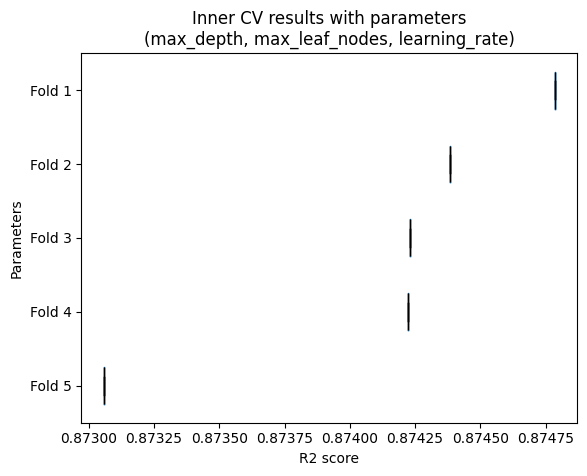

In [18]:
import matplotlib.pyplot as plt

# Sort the inner_cv_results by the mean of the columns
sorted_inner_cv_results = inner_cv_results.mean().sort_values().index
inner_cv_results = inner_cv_results[sorted_inner_cv_results]

color = {"whiskers": "black", "medians": "black", "caps": "black"}
inner_cv_results.plot.box(vert=False, color=color)
plt.xlabel("R2 score")
plt.ylabel("Parameters")
_ = plt.title(
    "Inner CV results with parameters\n" "(max_depth, max_leaf_nodes, learning_rate)"
)

We see that the first 4 ranked set of parameters are very close. We could select any of these 4 combinations. It coincides with the results we observe when inspecting the best parameters of the outer CV.